In [1]:
import nltk
import numpy as np
import pandas as pd
np.set_printoptions(linewidth=120)

In [2]:
sentences=['I enjoy flying','I like NLP','I like deep learning']

In [3]:
vocab=list(set((" ".join(sentences)).split()))

In [4]:
text_data=[]
for i in sentences:
    text_data.append(i.split())

In [5]:
def MinWords():
    numWords = [len(sentence.split()) for sentence in sentences]
    return min(numWords)

In [6]:
MinWords()

3

In [7]:
def win_size():
    win_size=int(input('Enter window size: '))
    if(MinWords()<=win_size):
        print('operation not possible,select a smaller window_size')
        win_size()
    else:
        return win_size

In [8]:
window_size=win_size()

Enter window size: 1


In [9]:
w=[]
for i in sentences:
    i=i.split(' ') #if i is list
    for k in range(len(i)-window_size+1):
        for l in range(k+1,k+window_size+1):
            if l<=len(i)-1:
                w.append([i[k],i[l]])

In [10]:
len(w)

7

In [11]:
w1=[x[::-1] for x in w]
w.extend(w1)

In [12]:
len(w)

14

In [13]:
a=np.zeros((len(vocab),len(vocab)))

In [14]:
df=pd.DataFrame(a,index=vocab,columns=vocab)

In [15]:
for i in w:
    df.at[i[0],i[1]]+=1

In [16]:
from numpy import array
from scipy.linalg import svd
from numpy import diag
from numpy import dot
# define a matrix
A = array(df)
print('Matrix A is: \n')
print(A)
# SVD
U, s, VT = svd(A)
print('*'*120)
print('Matrix U is: \n')
print(U)
print('*'*120)
Sigma = diag(s)
print('Matrix Sigma is: \n')
print(Sigma)
print('*'*120)
print('Matrix VT is: \n')
print(VT)

Matrix A is: 

[[0. 1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 2.]
 [0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 2. 1. 0. 0. 0.]]
************************************************************************************************************************
Matrix U is: 

[[ 1.11022302e-16  4.05335466e-01  7.77156117e-16  6.53095258e-01  6.66133815e-16 -6.39663774e-01 -6.99120968e-17]
 [-1.53510165e-01  3.88578059e-16  5.47397857e-01  1.11022302e-16 -8.22672605e-01  1.11022302e-16  6.16297582e-33]
 [-9.16756682e-01 -4.44089210e-16  2.31803980e-01 -2.22044605e-16  3.25306166e-01  5.55111512e-17  1.84889275e-32]
 [-3.68770682e-01  1.09634524e-15 -8.04128411e-01  4.44089210e-16 -4.66246376e-01 -1.38777878e-16 -2.15704154e-32]
 [ 2.57313336e-17  3.47197522e-01  2.74814331e-16  1.94288659e-01  3.75168937e-16  4.18376781e-01 -8.16496581e-01]
 [ 0.00000000e+00  1.39662213e-01  0.00000000e+00 -6.73987697e-01  0.00000000e+00 -5.99640212e-01 -4.0824

In [17]:
U.shape,Sigma.shape,VT.shape

((7, 7), (7, 7), (7, 7))

In [18]:
k=int(input('Enter k: '))
if(k>len(vocab) or k<1):
    print('operation not possible, select a k between 1 and ',len(vocab))
    raise SystemExit("Stop right there!")

Enter k: 3


In [19]:
U=U[:,:k]
Sigma=Sigma[:k,:k]
VT=VT[:k,:]

In [20]:
U.shape,Sigma.shape,VT.shape

((7, 3), (3, 3), (3, 7))

In [21]:
U_df=pd.DataFrame(U,index=vocab)
U_df

,0,1,2
deep,1.110223e-16,4.053355e-01,7.771561e-16
learning,-1.535102e-01,3.885781e-16,5.473979e-01
like,-9.167567e-01,-4.440892e-16,2.318040e-01
enjoy,-3.687707e-01,1.096345e-15,-8.041284e-01
NLP,2.573133e-17,3.471975e-01,2.748143e-16
flying,0.000000e+00,1.396622e-01,0.000000e+00
I,5.146267e-17,8.340573e-01,5.496287e-16


In [22]:
model={}
c=0
for i in list(U_df.index):
    model[i]=list(U_df.loc[i])
    c=c+1

In [23]:
model

{'deep': [1.1102230246251565e-16, 0.4053354659702686, 7.771561172376096e-16],
 'learning': [-0.15351016479142832, 3.885780586188048e-16, 0.5473978574979734],
 'like': [-0.9167566816845836, -4.440892098500626e-16, 0.2318039795131882],
 'enjoy': [-0.3687706819859463, 1.096345236817342e-15, -0.804128410571644],
 'NLP': [2.5731333637454082e-17, 0.34719752179140934, 2.7481433070500897e-16],
 'flying': [0.0, 0.13966221294354325, 0.0],
 'I': [5.1462667274908164e-17, 0.8340572565263618, 5.496286614100179e-16]}

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline


def display_pca_scatterplot(model, words=None, sample=0):
    word_vectors = np.array([model[w] for w in words])
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    plt.figure(figsize=(15,15))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    plt.savefig("test.png")
    plt.show()
        
        
def display_tsne_scatterplot(model, words=None, sample=0):
    word_vectors = np.array([model[w] for w in words])
    twodim = TSNE().fit_transform(word_vectors)[:,:2]
    plt.figure(figsize=(15,15))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    plt.savefig("test.png")
    plt.show()

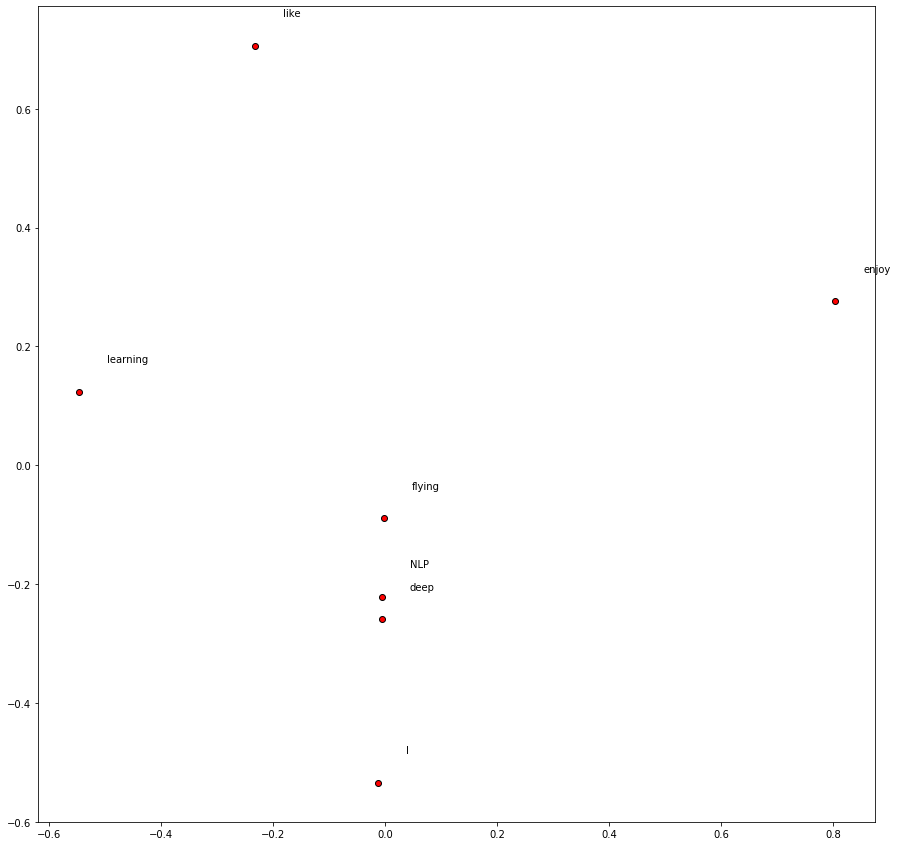

In [30]:
display_pca_scatterplot(model,list(U_df.index))

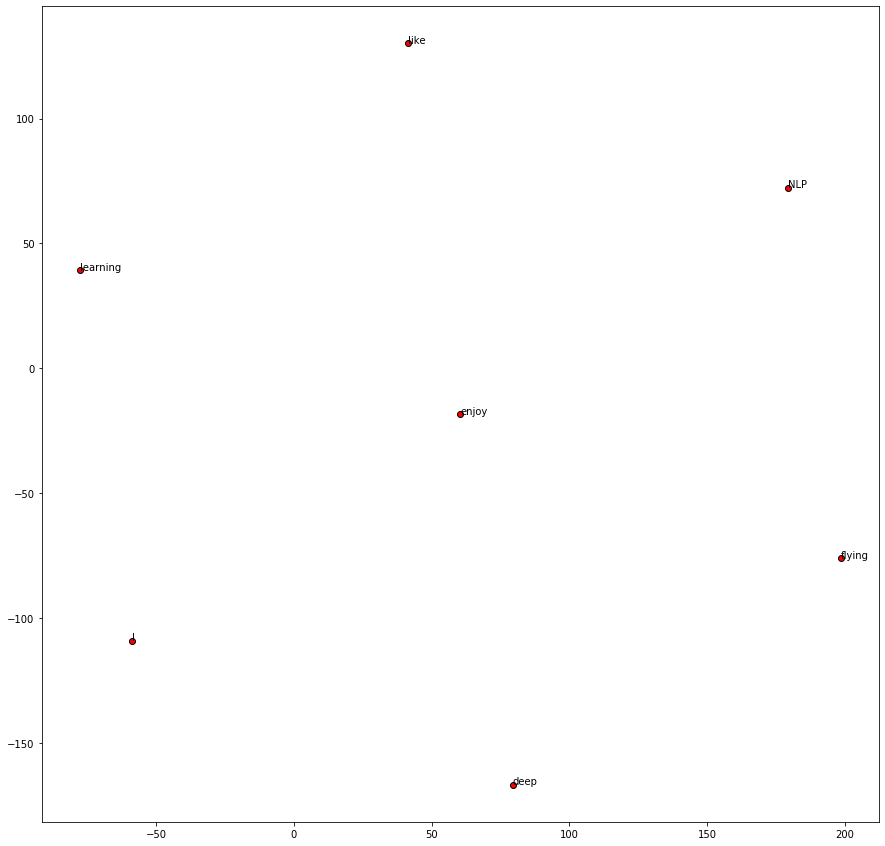

In [31]:
display_tsne_scatterplot(model,list(U_df.index))